# Predicción de rating de usuarios a nuevos juegos de mesa.

<a id="0"></a> <br>
### Índice:
1. [Introducción](#1)
2. [Modelos supervisados](#2)  
    2.1 [Modelo regresion lineal pólinomica](#3)  
    2.2 [Modelo Decision Tree Regresor](#4)  
    2.3 [Modelo Random Forest Regressor](#5)  
    2.4 [ADA Boosting Regressor](#6)  
    2.5 [Gradient Boosting regressor](#7)    
3. [Modelos no supervisados](#8)  
    3.1 [PCA con Random Forest Regressor](#9)  



<a id="1"></a> <br>
### Introducción

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA




In [3]:
dtype_dict = {'Mech Not Defined': "uint8", 'Mech_Acting': "uint8", 'Mech_Action':"uint8", 'Mech_tokens':"uint8",
       'Mech_construcc_farm':"uint8", 'Mech_roll_thng':"uint8", 'Mech_cards':"uint8", 'Mech_role_camp':"uint8",
       'Mech_board':"uint8", 'Mech_money':"uint8", 'Mech_score':"uint8", 'Mech_turnbased':"uint8", 'Mech_team':"uint8",
       'Mech_skill':"uint8", 'Mech_solo':"uint8", 'Abstract':"uint8", 'Children':"uint8", 'Customizable':"uint8",
       'Family':"uint8", 'Party':"uint8", 'Strategy':"uint8", 'Thematic':"uint8", 'Wargames':"uint8",
       'Domain_Not Defined':"uint8"
        }
df = pd.read_csv("../data/processed/bgg_proc_ml.csv", dtype = dtype_dict)


Mantenemos las columnas creadas anteriormente con 1 y 0 con int8 para que los procesos de carga sean más bajos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   20343 non-null  float64
 1   Name                 20343 non-null  object 
 2   Year Published       20343 non-null  int64  
 3   Min Players          20343 non-null  int64  
 4   Max Players          20343 non-null  int64  
 5   Play Time            20343 non-null  int64  
 6   Min Age              20343 non-null  int64  
 7   Users Rated          20343 non-null  int64  
 8   Rating Average       20343 non-null  float64
 9   BGG Rank             20343 non-null  int64  
 10  Complexity Average   20343 non-null  float64
 11  Owned Users          20343 non-null  int64  
 12  Mechanics            20343 non-null  object 
 13  Domains              20343 non-null  object 
 14  Mech Not Defined     20343 non-null  uint8  
 15  Mech_Acting          20343 non-null 

In [5]:
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,...,Mech_solo,Abstract,Children,Customizable,Family,Party,Strategy,Thematic,Wargames,Domain_Not Defined
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,...,1,0,0,0,0,0,1,1,0,0
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,...,0,0,0,0,0,0,1,1,0,0
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,...,0,0,0,0,0,0,1,0,0,0
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,...,1,0,0,0,0,0,1,0,0,0
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,...,0,0,0,0,0,0,1,1,0,0


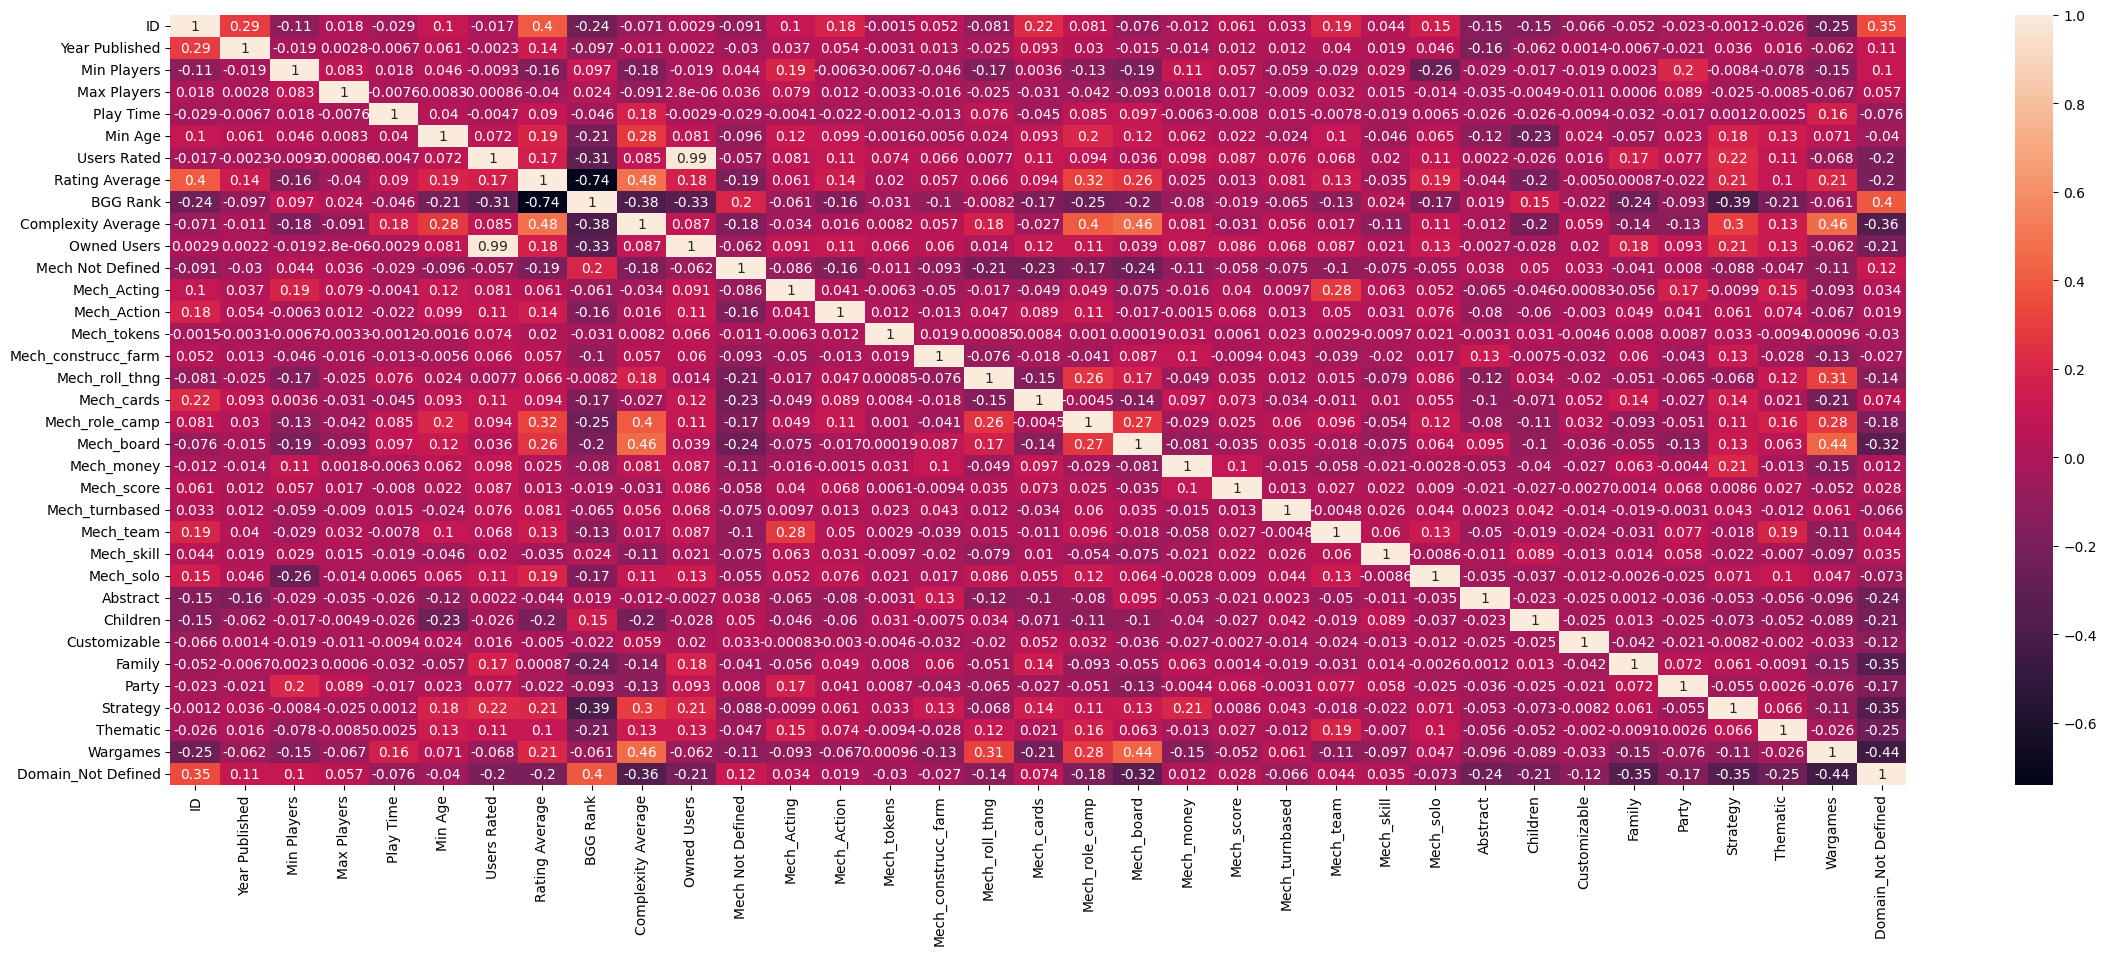

In [6]:
plt.figure(figsize=(28,10))
sns.heatmap(df.corr(),annot=True);

[Volver al índice](#0)

<a id="2"></a> <br>
## **2. Modelos supervisados**

Vamos a hacer una selección de features primero para hacer pequeñas pruebas para ver si compensa o no hacer estos modelos de manera definitiva. Para ello haremos dos X e y. Una para hacer modelo definitivo de ML y otro para pruebas.

Variables para pruebas de modelos. (Descomentar para utlizar)

In [ ]:
# X = df[["BGG Rank","Complexity Average","Mech_role_camp","Strategy","Wargames"]] # Variables para pruebas que pueden ser pesadas
# y = df["Rating Average"]

Variables para modelos definitivos. (Descomentar para utilizar)

In [7]:
X = df.drop(['ID','Name','Year Published','Rating Average','Users Rated','Mechanics','Domains'],axis=1)
y = df['Rating Average']

<a id="3"></a> <br>
### **2.1 Modelo Regresión Lineal**

Para la regresion lineal voy a coger para X las variables que tienen más correlación con Rating Average (ya sea positiva o negativa)

Vamos a probar con una regresion lineal primero con polinomio de diferentes grados.

In [7]:
X = df[["BGG Rank","Complexity Average","Mech_role_camp","Strategy","Wargames"]] # Variables para pruebas que pueden ser pesadas
y = df["Rating Average"]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for i in range(1,5):
    poly_feats = PolynomialFeatures(degree = i)
    poly_feats.fit(X)
    X_poly = poly_feats.transform(X)
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_poly,y,test_size=0.20,random_state=5)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    
    # Imprimimos por pantalla los diferentes resultados para diferentes grados de polinomios.
    print(f"Valores para polinomios de grado {i}")
    print("MAE:", round(mean_absolute_error(y_test, y_pred),4))
    print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred),4))
    print("MSE:", round(mean_squared_error(y_test, y_pred),4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
    print("r2_score train", round(lin_reg.score(X_train, y_train),4))
    print("r2_score test",round(lin_reg.score(X_test, y_test),4))
    print("\n")
    
    

Valores para polinomios de grado 1
MAE: 0.421
MAPE: 0.068
MSE: 0.3403
RMSE: 0.5833
r2_score train 0.6139
r2_score test 0.6105


Valores para polinomios de grado 2
MAE: 0.3789
MAPE: 0.0604
MSE: 0.2696
RMSE: 0.5193
r2_score train 0.6983
r2_score test 0.6914


Valores para polinomios de grado 3
MAE: 0.356
MAPE: 0.0564
MSE: 0.2356
RMSE: 0.4854
r2_score train 0.7349
r2_score test 0.7304


Valores para polinomios de grado 4
MAE: 0.4588
MAPE: 0.0735
MSE: 0.3889
RMSE: 0.6236
r2_score train 0.5359
r2_score test 0.5549




Vemos que el score a medida que vamos subiendo el grado del polinomio vamos bajando el error hasta que en polinomio de grado 4 vemos que tanto el error como el score baja drasticamente.

Marcamos entonces como grado 3 el modelo a valorar.

Probamos con todas las variables para ver como funciona

In [9]:
X = df.drop(['ID','Name','Year Published','Rating Average','Users Rated','Mechanics','Domains'],axis=1)
y = df['Rating Average']

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for i in range(1,4):
    poly_feats = PolynomialFeatures(degree = i)
    poly_feats.fit(X)
    X_poly = poly_feats.transform(X)
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_poly,y,test_size=0.20,random_state=5)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    
    # Imprimimos por pantalla los diferentes resultados para diferentes grados de polinomios.
    print(f"Valores para polinomios de grado {i}")
    print("MAE:", round(mean_absolute_error(y_test, y_pred),4))
    print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred),4))
    print("MSE:", round(mean_squared_error(y_test, y_pred),4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
    print("r2_score train", round(lin_reg.score(X_train, y_train),4))
    print("r2_score test",round(lin_reg.score(X_test, y_test),4))
    print("\n")
    
    

Valores para polinomios de grado 1
MAE: 0.4007
MAPE: 0.065
MSE: 0.3081
RMSE: 0.5551
r2_score train 0.6594
r2_score test 0.6474


Valores para polinomios de grado 2
MAE: 0.3603
MAPE: 0.0581
MSE: 0.2579
RMSE: 0.5078
r2_score train 0.7544
r2_score test 0.7049


Valores para polinomios de grado 3
MAE: 0.8063
MAPE: 0.1271
MSE: 303.8396
RMSE: 17.431
r2_score train 0.8373
r2_score test -346.7546




Como comprobamos al poner todo el conjunto de variables subimos el MAE con polinomio de grado tres, por tanto necesitariamos probar con otro modelo ya que en este caso el polinomio que mejor funciona es el grado 2 con un score de 0.70 y un error medio de 0.36 es escaso.

[Volver al índice](#0)

<a id="4"></a> <br>
### **2.2 Arboles de decisión**

Por el momento solo vamos a entrenar muy pocos parametros de un arbol de decisión

In [43]:
X = df[["BGG Rank","Complexity Average","Mech_role_camp","Strategy","Wargames"]] # Variables para pruebas que pueden ser pesadas
y = df["Rating Average"]

In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [53]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=5)

parameters = {"max_depth":[10,12,14],
              "criterion": ['absolute_error'],
              "min_samples_split": [4,8],
              "min_samples_leaf": [5,7],
              "max_features": [1,2,3]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [54]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=5),
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [10, 12, 14], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [5, 7],
                         'min_samples_split': [4, 8]},
             scoring='neg_mean_absolute_error')

In [55]:
dtr_gs.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=10, max_features=3,
                      min_samples_leaf=5, min_samples_split=4, random_state=5)

In [56]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))

R2 0.7254
MAE 0.3476
MAPE 0.0548
MSE 0.24
RMSE 0.4899


No tiene mala pinta bajamos el MAE un poco con pocos datos... Intentemos con una muestra mayor.

In [11]:
X = df.drop(['ID','Name','Year Published','Rating Average','Users Rated','Mechanics','Domains'],axis=1)
y = df['Rating Average']

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocesamiento con StandardScaler
    ('model', DecisionTreeRegressor())  # El modelo DecisionTreeRegressor
])

# Definir los parámetros para GridSearchCV
parameters = {
    'scaler__with_mean': [True, False],
    'model__max_depth': [15, 16],
    'model__criterion': ['absolute_error'],
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [6, 7, 8],
    'model__max_features': [12, 13, 14],
    'model__random_state': [5]
}

# Crear el objeto GridSearchCV
dtr_gs = GridSearchCV(pipeline, parameters, cv=5, scoring="neg_mean_absolute_error")


In [14]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__criterion': ['absolute_error'],
                         'model__max_depth': [15, 16],
                         'model__max_features': [12, 13, 14],
                         'model__min_samples_leaf': [6, 7, 8],
                         'model__min_samples_split': [2, 3, 4],
                         'model__random_state': [5],
                         'scaler__with_mean': [True, False]},
             scoring='neg_mean_absolute_error')

In [15]:
dtr_gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=16,
                                       max_features=14, min_samples_leaf=8,
                                       random_state=5))])

In [16]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 

R2 0.7865
MAE 0.2942
MAPE 0.0455
MSE 0.1866
RMSE 0.4319


Hice varias pruebas tanto con escalado y sin escalar obtiendo practicamente los mismo resultados por lo que no es conveniente hacer todo el proceso de escalado y quitar rendimiento a la CPU. Solo haremos GS con los hiperparametros anteriores.

La mejor configuración probada para este modelo es la anterior, después de probar me dí cuenta que al meter más features no mejoraba y si iba cambiando el depth tampoco en exceso

[Volver al índice](#0)

<a id="5"></a> <br>
### **2.3 Random Forest Regressor**

Como hemos hecho anteriormente, primero probamos con pocas variables para ver si puede funcionar esta aproximación.

In [157]:
X = df[["BGG Rank","Complexity Average","Mech_role_camp","Strategy","Wargames"]] # Variables para pruebas que pueden ser pesadas
y = df["Rating Average"]

In [158]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [159]:
# Definir los parámetros para GridSearchCV
model = RandomForestRegressor()

parameters = {
    'n_estimators': [100], 
    'max_depth': [16,18],  
    'min_samples_split': [2, 4, 8],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [1, 2, 3]
}

rnm_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [160]:
rnm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [16, 18], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error')

In [161]:
rnm_gs.best_estimator_

RandomForestRegressor(max_depth=16, max_features=3, min_samples_leaf=4,
                      min_samples_split=4)

In [162]:
y_pred = rnm_gs.best_estimator_.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 

R2 0.744
MAE 0.338
MAPE 0.0532
MSE 0.2236
RMSE 0.4729


Vemos que hay bastantes buenos resultado con pocos features dentro de X, vamos a implementar más en ellos.

In [17]:
X = df.drop(['ID','Name','Year Published','Rating Average','Users Rated','Mechanics','Domains'],axis=1)
y = df['Rating Average']

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [19]:
# Definir los parámetros para GridSearchCV
model = RandomForestRegressor(random_state=5)

parameters = {
    'n_estimators': [100,150], 
    'max_depth': [20],  
    'min_samples_split': [4,6],  
    'min_samples_leaf': [5],  
    'max_features': [21,23]
}

rnm_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [20]:
rnm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
             param_grid={'max_depth': [20], 'max_features': [21, 23],
                         'min_samples_leaf': [5], 'min_samples_split': [4, 6],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_absolute_error')

In [21]:
rnm_gs.best_estimator_

RandomForestRegressor(max_depth=20, max_features=23, min_samples_leaf=5,
                      min_samples_split=4, n_estimators=150, random_state=5)

In [22]:
y_pred = rnm_gs.best_estimator_.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 

R2 0.87
MAE 0.2279
MAPE 0.0353
MSE 0.1136
RMSE 0.337


Después de probar multiples variantes, esta es la mejor combinación, podemos seguir bajando muy poco el MAE y subiendo el r2 subiendo el número de features  pero computacionalmente está mejor que no forcemos tanto la CPU y busquemos una mejor salida sin ser especial cara en recursos.

<a id="6"></a> <br>
### **2.4 AdaBoostRegressor**

Empezaremos como empezamos todos las predicciones, empezamos con una cantidas de features pequeña para ver que tal va a ir el proceso.

In [202]:
X = df[["BGG Rank","Complexity Average","Mech_role_camp","Strategy","Wargames"]] # Variables para pruebas que pueden ser pesadas
y = df["Rating Average"]

In [203]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [204]:
ada_reg = AdaBoostRegressor(random_state=5)

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001 ,0.2,0.7,0.8,0.9]
}

ada_reg_gs = GridSearchCV(ada_reg, parameters, scoring='neg_mean_squared_error', cv=5)

ada_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.2, 0.7, 0.8,
                                           0.9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [206]:
y_pred = ada_reg_gs.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 


R2 0.6803
MAE 0.3993
MAPE 0.0631
MSE 0.2793
RMSE 0.5285


No tienen muy buena pinta los primeros resultado, aún así intentaremos con todas las variables tener el mejor rendimiento posible.

In [23]:
X = df.drop(['ID','Name','Year Published','Rating Average','Users Rated','Mechanics','Domains'],axis=1)
y = df['Rating Average']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [24]:
ada_reg = AdaBoostRegressor(random_state=5)

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001 ,0.2,0.7,0.8,0.9]
}

ada_reg_gs = GridSearchCV(ada_reg, parameters, scoring='neg_mean_squared_error', cv=5)

ada_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.2, 0.7, 0.8,
                                           0.9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [25]:
y_pred = ada_reg_gs.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 


R2 0.6821
MAE 0.3989
MAPE 0.0629
MSE 0.2777
RMSE 0.527


El mejor resultado obtenido es el anterior que está muy lejos de sus competidores.

[Volver al índice](#0)

<a id="7"></a> <br>
### **2.5 GradientBoostingRegressor**

Probamos primero con pocos features que tienen una buena correlación.

In [5]:
X = df[["BGG Rank","Complexity Average","Mech_role_camp","Strategy","Wargames"]] # Variables para pruebas que pueden ser pesadas
y = df["Rating Average"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [9]:
gbrt = GradientBoostingRegressor(random_state = 5)
parameters = {'max_depth':[10,15],
              'n_estimators': [100,150],
              'learning_rate': [0.1, 0.01, 0.001 ,0.2,0.7,0.8,0.9]
}

gbrt = GridSearchCV(gbrt, parameters, scoring='neg_mean_squared_error', cv=5)

gbrt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.2, 0.7, 0.8,
                                           0.9],
                         'max_depth': [10, 15], 'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [10]:
y_pred = gbrt.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 

R2 0.7312
MAE 0.3442
MAPE 0.0544
MSE 0.2349
RMSE 0.4846


No tienen mala pinta los primero resultado obtenido con pocas features. Probamos con más.

In [26]:
X = df.drop(['ID','Name','Year Published','Rating Average','Users Rated','Mechanics','Domains'],axis=1)
y = df['Rating Average']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [27]:
gbrt = GradientBoostingRegressor(random_state = 5)
parameters = {'max_depth':[13,15,18],
              'n_estimators': [100,150],
              'learning_rate': [0.1, 0.01, 0.001 ,0.2,0.7,0.8,0.9]
}

gbrt = GridSearchCV(gbrt, parameters, scoring='neg_mean_squared_error', cv=5)

gbrt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.2, 0.7, 0.8,
                                           0.9],
                         'max_depth': [13, 15, 18],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [28]:
gbrt.best_estimator_

GradientBoostingRegressor(max_depth=13, n_estimators=150, random_state=5)

In [29]:
y_pred = gbrt.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 

R2 0.8579
MAE 0.2334
MAPE 0.036
MSE 0.1242
RMSE 0.3524


Hasta el momento es el segundo mejor modelo que mejor resultado tiene, pero lleva más tiempo practicarlo...¿Vale la pena por una diferencia tan leve? Lo veremos [aquí](https://github.com/Kuja182/Prediccion-rating-de-usuarios-de-juegos-de-mesa/blob/main/notebooks/04_Evaluacion_Modelo.ipynb)

[Volver al índice](#0)

<a id="8"></a> <br>
## **Modelo no supervisado**

<a id="9"></a> <br>
### **PCA con Random Forest Regressor**

Haremos un pipeline primero con un PCA para despues hacer un Random forest que es el modelo que a priori nos dio mejor resultados en cuanto a gasto de recursos y errores.

In [30]:
X = df.drop(['ID','Name','Year Published','Rating Average','Users Rated','Mechanics','Domains'],axis=1)
y = df['Rating Average']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [31]:
pipe_gs = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestRegressor())
])
pipe_gs

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier', RandomForestRegressor())])

In [32]:
params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7],
    'classifier__max_depth': [10,15,20],
    'classifier__min_samples_leaf': [2,3,4]
}

gs = GridSearchCV(pipe_gs, params, cv=5, scoring='neg_mean_squared_error')

In [33]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid={'classifier__max_depth': [10, 15, 20],
                         'classifier__min_samples_leaf': [2, 3, 4],
                         'pca__n_components': [5, 6, 7],
                         'scaler': [StandardScaler(), None]},
             scoring='neg_mean_squared_error')

In [26]:
gs.best_estimator_

Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=7)),
                ('classifier',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2))])

In [28]:
y_pred = gs.predict(X_test)

print("R2", round(r2_score(y_test, y_pred),4))
print("MAE", round(mean_absolute_error(y_test, y_pred),4))
print("MAPE", round(mean_absolute_percentage_error(y_test, y_pred),4))
print("MSE", round(mean_squared_error(y_test, y_pred),4))
print("RMSE", round(np.sqrt(mean_squared_error(y_test, y_pred)),4)) 

R2 0.8426
MAE 0.2479
MAPE 0.0386
MSE 0.1375
RMSE 0.3709


No son para nada malos resultados respecto a sus competidores, pero aún así como los datos ya está etiquetados, los modelos supervisados funcionan mejor. 

[Volver al índice](#0)